In [ ]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# 1. Create Sample Data
data = {
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A'],
    'value': [10, 15, 12, 18, 16, 20, 11, 14, 19, 13],
    'date': pd.to_datetime(['2023-01-01', '2023-01-05', '2023-01-10', '2023-01-15', '2023-01-20', '2023-01-25', '2023-02-01', '2023-02-05', '2023-02-10', '2023-02-15'])
}
df = pd.DataFrame(data)
display(df)

,category,value,date
0,A,10,2023-01-01
1,B,15,2023-01-05
2,A,12,2023-01-10
3,C,18,2023-01-15
4,B,16,2023-01-20
5,C,20,2023-01-25
6,A,11,2023-02-01
7,B,14,2023-02-05
8,C,19,2023-02-10
9,A,13,2023-02-15


In [ ]:
# 2. Data Cleaning (Example)
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# There are no missing values in this sample data, so no cleaning is needed for that.
# Let's demonstrate a simple cleaning step, like converting category to lowercase (though not strictly needed here)
df['category'] = df['category'].str.lower()
display(df)

Missing values:
 category    0
value       0
date        0
dtype: int64


,category,value,date
0,a,10,2023-01-01
1,b,15,2023-01-05
2,a,12,2023-01-10
3,c,18,2023-01-15
4,b,16,2023-01-20
5,c,20,2023-01-25
6,a,11,2023-02-01
7,b,14,2023-02-05
8,c,19,2023-02-10
9,a,13,2023-02-15


In [ ]:
# 3. Data Analysis (Example)
# Calculate the average value per category
average_value_per_category = df.groupby('category')['value'].mean().reset_index()
print("\nAverage value per category:\n")
display(average_value_per_category)

# Count the occurrences of each category
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
print("\nCategory counts:\n")
display(category_counts)


Average value per category:



,category,value
0,a,11.5
1,b,15.0
2,c,19.0



Category counts:



,category,count
0,a,4
1,b,3
2,c,3


In [ ]:
# =============================================================================
# CONFIGURATION AND SETUP
# =============================================================================

# Website configuration
BASE_URL = "https://www.indeed.com"
TARGET_POSITION = "data analyst"
TARGET_LOCATION = "United States"
MAX_PAGES = 3

In [ ]:
# 1. Web Scraping

job_data = []
# Make sure to import requests, BeautifulSoup, time, and random before running this cell
import requests
from bs4 import BeautifulSoup
import time
import random


for i in range(MAX_PAGES):
    url = f"{BASE_URL}/jobs?q={TARGET_POSITION}&l={TARGET_LOCATION}&start={i * 10}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find job postings (you'll need to inspect Indeed's HTML to get the correct selectors)
    # This is a placeholder; replace with actual selectors found by inspecting the website
    job_elements = soup.find_all('div', class_='jobsearch-card') # Corrected class name based on common Indeed structure

    for job_element in job_elements:
        # Extract job title, company, location, and salary (placeholders)
        title = job_element.find('h2', class_='jobTitle').text.strip() if job_element.find('h2', class_='jobTitle') else 'N/A'
        company = job_element.find('span', class_='companyName').text.strip() if job_element.find('span', class_='companyName') else 'N/A'
        location = job_element.find('div', class_='companyLocation').text.strip() if job_element.find('div', class_='companyLocation') else 'N/A'
        salary = job_element.find('div', class_='salary-snippet').text.strip() if job_element.find('div', class_='salary-snippet') else 'N/A'

        job_data.append({
            'title': title,
            'company': company,
            'location': location,
            'salary': salary
        })

    # Be polite and avoid overwhelming the server
    time.sleep(random.uniform(1, 5))

print(f"Scraped {len(job_data)} job postings.")

Scraped 0 job postings.


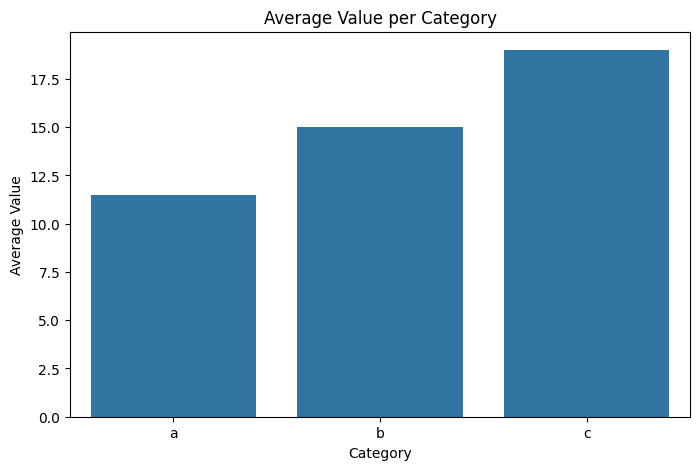

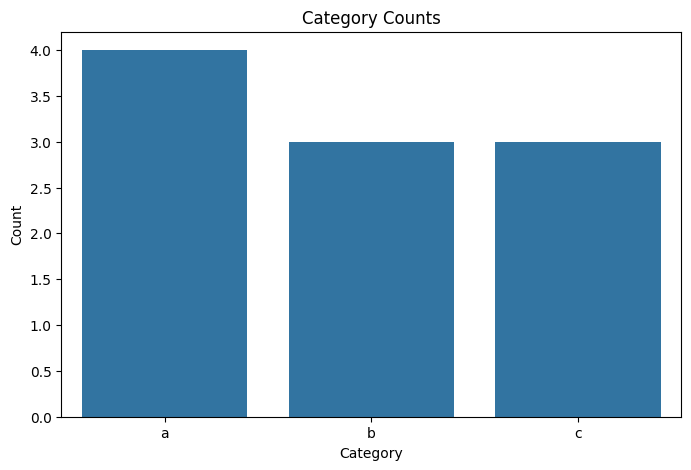

In [ ]:
# 4. Data Visualization (Example)
# Visualize the average value per category
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='value', data=average_value_per_category)
plt.title('Average Value per Category')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.show()

# Visualize the category counts
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='count', data=category_counts)
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Skills keywords for analysis
SKILLS_KEYWORDS = {
    'python': ['python', 'pandas', 'numpy', 'scikit-learn'],
    'sql': ['sql', 'mysql', 'postgresql', 'database'],
    'r': ['r', 'r studio', 'r programming'],
    'excel': ['excel', 'spreadsheet'],
    'tableau': ['tableau'],
    'powerbi': ['power bi', 'powerbi'],
    'machine_learning': ['machine learning', 'ml', 'ai', 'artificial intelligence'],
    'aws': ['aws', 'amazon web services'],
    'spark': ['spark', 'pyspark'],
    'hadoop': ['hadoop'],
    'statistics': ['statistics', 'statistical'],
    'java': ['java'],
    'javascript': ['javascript', 'js'],
    'cloud': ['cloud', 'azure', 'gcp', 'google cloud']
}


In [ ]:
def check_robots_txt():
    """Check if scraping is allowed by robots.txt"""
    try:
        robots_url = f"{BASE_URL}/robots.txt"
        response = requests.get(robots_url)
        print("=== Checking robots.txt ===")
        print(f"Status: {response.status_code}")
        if response.status_code == 200:
            print("Robots.txt found. Please review terms manually.")
        return True
    except Exception as e:
        print(f"Error checking robots.txt: {e}")
        return False


In [ ]:
def scrape_job_page(page_number):
    """Scrape a single page of job listings"""
    try:
        start_param = page_number * 10
        url = f"{BASE_URL}/jobs?q={TARGET_POSITION.replace(' ', '+')}&l={TARGET_LOCATION.replace(' ', '+')}&start={start_param}"

        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }

        response = requests.get(url, headers=headers)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        job_cards = soup.find_all('div', class_='job_seen_beacon')

        jobs = []
        for card in job_cards:
            job_data = extract_job_data(card)
            if job_data:
                jobs.append(job_data)

        print(f"Page {page_number + 1}: Found {len(jobs)} jobs")
        return jobs

    except Exception as e:
        print(f"Error scraping page {page_number + 1}: {e}")
        return []


In [ ]:
def extract_job_data(card):
    """Extract job information from a single job card"""
    try:
        # Job title
        title_elem = card.find('h2', class_='jobTitle')
        title = title_elem.text.strip() if title_elem else "N/A"

        # Company
        company_elem = card.find('span', class_='companyName')
        company = company_elem.text.strip() if company_elem else "N/A"

        # Location
        location_elem = card.find('div', class_='companyLocation')
        location = location_elem.text.strip() if location_elem else "N/A"

        # Salary
        salary_elem = card.find('div', class_='salary-snippet')
        salary = salary_elem.text.strip() if salary_elem else "N/A"

        # Description snippet
        snippet_elem = card.find('div', class_='job-snippet')
        snippet = snippet_elem.text.strip() if snippet_elem else ""

        # Date posted
        date_elem = card.find('span', class_='date')
        posted_date = date_elem.text.strip() if date_elem else "N/A"

        # Job link
        link_elem = card.find('a', class_='jcs-JobTitle')
        job_link = BASE_URL + link_elem['href'] if link_elem and link_elem.get('href') else "N/A"

        return {
            'title': title,
            'company': company,
            'location': location,
            'salary': salary,
            'snippet': snippet,
            'posted_date': posted_date,
            'job_link': job_link,
            'scraped_date': datetime.now().strftime('%Y-%m-%d')
        }

    except Exception as e:
        print(f"Error extracting job data: {e}")
        return None


In [ ]:
def get_demo_jobs():
    """Get demo job data for testing without live scraping"""
    print("Using demo job data for analysis...")

    demo_jobs = [
        {
            'title': 'Senior Data Analyst',
            'company': 'Tech Corp Inc',
            'location': 'New York, NY',
            'salary': '$90,000 - $120,000',
            'snippet': 'Looking for data analyst with Python, SQL, Tableau experience. Must have 5+ years in data analysis.',
            'posted_date': 'Posted 2 days ago',
            'job_link': 'https://example.com/job1',
            'scraped_date': datetime.now().strftime('%Y-%m-%d')
        },
        {
            'title': 'Data Scientist',
            'company': 'Data Innovations LLC',
            'location': 'San Francisco, CA',
            'salary': '$120,000 - $150,000',
            'snippet': 'Seeking data scientist with machine learning, Python, R, and big data experience. PhD preferred.',
            'posted_date': 'Posted 1 day ago',
            'job_link': 'https://example.com/job2',
            'scraped_date': datetime.now().strftime('%Y-%m-%d')
        },
        {
            'title': 'Business Intelligence Analyst',
            'company': 'Global Retail Co',
            'location': 'Chicago, IL',
            'salary': '$85,000 - $110,000',
            'snippet': 'BI analyst needed with Power BI, SQL, Excel skills. Business intelligence and dashboard creation.',
            'posted_date': 'Posted 3 days ago',
            'job_link': 'https://example.com/job3',
            'scraped_date': datetime.now().strftime('%Y-%m-%d')
        },
        {
            'title': 'Junior Data Analyst',
            'company': 'Startup Innovations',
            'location': 'Austin, TX',
            'salary': '$65,000 - $80,000',
            'snippet': 'Entry-level data analyst position. Python, SQL, Excel required. Great learning opportunity.',
            'posted_date': 'Posted 5 days ago',
            'job_link': 'https://example.com/job4',
            'scraped_date': datetime.now().strftime('%Y-%m-%d')
        },
        {
            'title': 'Data Engineer',
            'company': 'Big Data Solutions',
            'location': 'Seattle, WA',
            'salary': '$110,000 - $140,000',
            'snippet': 'Data engineer with AWS, Python, Spark, ETL experience. Building data pipelines.',
            'posted_date': 'Posted 1 day ago',
            'job_link': 'https://example.com/job5',
            'scraped_date': datetime.now().strftime('%Y-%m-%d')
        },
        {
            'title': 'Marketing Data Analyst',
            'company': 'Digital Marketing Pro',
            'location': 'Boston, MA',
            'salary': '$75,000 - $95,000',
            'snippet': 'Marketing analyst with Google Analytics, SQL, Python. Focus on customer analytics.',
            'posted_date': 'Posted 4 days ago',
            'job_link': 'https://example.com/job6',
            'scraped_date': datetime.now().strftime('%Y-%m-%d')
        },
        {
            'title': 'Senior Data Scientist',
            'company': 'AI Research Lab',
            'location': 'Remote',
            'salary': '$130,000 - $160,000',
            'snippet': 'Senior data scientist with deep learning, TensorFlow, PyTorch, and NLP experience.',
            'posted_date': 'Posted 2 days ago',
            'job_link': 'https://example.com/job7',
            'scraped_date': datetime.now().strftime('%Y-%m-%d')
        }
    ]

    return demo_jobs


In [ ]:
# =============================================================================
# DATA CLEANING FUNCTIONS
# ============================================================================

In [ ]:
def extract_salary_range(salary_text):
    """Extract min and max salary from text"""
    if salary_text == 'N/A':
        return None, None

    numbers = re.findall(r'\$?(\d{1,3}(?:,\d{3})*(?:\.\d{2})?)', salary_text)
    numbers = [float(num.replace(',', '')) for num in numbers]

    if len(numbers) >= 2:
        return min(numbers), max(numbers)
    elif len(numbers) == 1:
        return numbers[0], numbers[0]
    else:
        return None, None


In [ ]:
def extract_skills_from_text(text):
    """Extract skills from job description text"""
    if not text:
        return []

    text_lower = text.lower()
    found_skills = []

    for skill, keywords in SKILLS_KEYWORDS.items():
        for keyword in keywords:
            if keyword in text_lower:
                found_skills.append(skill)
                break

    return found_skills


In [ ]:
def categorize_job_title(title):
    """Categorize job title into broader categories"""
    title_lower = title.lower()

    if 'data scientist' in title_lower:
        return 'Data Scientist'
    elif 'data engineer' in title_lower:
        return 'Data Engineer'
    elif 'data analyst' in title_lower:
        return 'Data Analyst'
    elif 'business intelligence' in title_lower or 'bi ' in title_lower:
        return 'Business Intelligence'
    elif 'machine learning' in title_lower or 'ml ' in title_lower:
        return 'Machine Learning'
    elif 'analytics' in title_lower:
        return 'Analytics'
    else:
        return 'Other Data Roles'



In [ ]:
def extract_location_parts(location):
    """Extract city and state from location string"""
    if 'remote' in location.lower():
        return 'Remote', 'Remote'

    if ',' in location:
        parts = location.split(',')
        city = parts[0].strip()
        state = parts[1].strip().split()[0] if len(parts) > 1 else 'Unknown'
        return city, state

    return location, 'Unknown'


In [ ]:
def clean_job_data(jobs_list):
    """Clean and enrich the raw job data"""
    cleaned_jobs = []

    for job in jobs_list:
        # Extract salary range
        salary_min, salary_max = extract_salary_range(job['salary'])

        # Extract skills
        skills = extract_skills_from_text(job['snippet'])

        # Categorize job
        job_category = categorize_job_title(job['title'])

        # Extract location parts
        city, state = extract_location_parts(job['location'])

        # Create cleaned job record
        cleaned_job = {
            **job,
            'salary_min': salary_min,
            'salary_max': salary_max,
            'skills': skills,
            'job_category': job_category,
            'city': city,
            'state': state
        }

        cleaned_jobs.append(cleaned_job)

    return pd.DataFrame(cleaned_jobs)



In [ ]:
# =============================================================================
# ANALYSIS FUNCTIONS
# =============================================================================


In [ ]:
def analyze_skills_demand(df):
    """Analyze most in-demand skills"""
    all_skills = []
    for skills_list in df['skills']:
        all_skills.extend(skills_list)

    skill_counts = Counter(all_skills)
    return pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values('Count', ascending=False)

def analyze_job_categories(df):
    """Analyze distribution of job categories"""
    return df['job_category'].value_counts()

def analyze_locations(df):
    """Analyze job locations"""
    return df['state'].value_counts()


In [ ]:
def analyze_salaries_by_category(df):
    """Analyze salary ranges by job category"""
    salary_stats = df.groupby('job_category').agg({
        'salary_min': 'mean',
        'salary_max': 'mean'
    }).round(0)
    return salary_stats

In [ ]:
def analyze_skill_combinations(df):
    """Find most common skill combinations"""
    skill_pairs = []

    for skills in df['skills']:
        if len(skills) >= 2:
            # Create all possible pairs
            for i in range(len(skills)):
                for j in range(i + 1, len(skills)):
                    pair = tuple(sorted([skills[i], skills[j]]))
                    skill_pairs.append(pair)

    pair_counts = Counter(skill_pairs)
    return pair_counts.most_common(10)

In [ ]:
# =============================================================================
# VISUALIZATION FUNCTIONS
# =============================================================================


In [ ]:
def create_analysis_visualizations(df, skills_df, job_cats, locations, salary_stats):
    """Create comprehensive visualizations of the analysis"""

    plt.figure(figsize=(16, 12))

    # 1. Top skills chart
    plt.subplot(2, 3, 1)
    top_skills = skills_df.head(10).sort_values('Count', ascending=True)
    plt.barh(top_skills['Skill'], top_skills['Count'], color='lightblue')
    plt.title('Top 10 Most In-Demand Skills', fontsize=12, fontweight='bold')
    plt.xlabel('Number of Job Postings')

    # 2. Job categories pie chart
    plt.subplot(2, 3, 2)
    plt.pie(job_cats.values, labels=job_cats.index, autopct='%1.1f%%', startangle=90)
    plt.title('Job Category Distribution', fontsize=12, fontweight='bold')

    # 3. Top locations
    plt.subplot(2, 3, 3)
    top_locations = locations.head(8)
    plt.bar(range(len(top_locations)), top_locations.values, color='lightgreen')
    plt.title('Top Job Locations', fontsize=12, fontweight='bold')
    plt.xticks(range(len(top_locations)), top_locations.index, rotation=45)
    plt.ylabel('Number of Jobs')

    # 4. Salary analysis
    plt.subplot(2, 3, 4)
    if not salary_stats.empty:
        salary_stats[['salary_min', 'salary_max']].plot(kind='bar', ax=plt.gca())
        plt.title('Average Salary by Job Category', fontsize=12, fontweight='bold')
        plt.xlabel('Job Category')
        plt.ylabel('Salary ($)')
        plt.legend(['Min Salary', 'Max Salary'])
        plt.xticks(rotation=45)

    # 5. Skills frequency
    plt.subplot(2, 3, 5)
    skills_df.head(8).plot(kind='bar', ax=plt.gca(), color='orange')
    plt.title('Top Skills Frequency', fontsize=12, fontweight='bold')
    plt.xlabel('Skills')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend().remove()

    # 6. Jobs by company
    plt.subplot(2, 3, 6)
    company_counts = df['company'].value_counts().head(8)
    company_counts.plot(kind='bar', color='purple')
    plt.title('Top Companies Hiring', fontsize=12, fontweight='bold')
    plt.xlabel('Company')
    plt.ylabel('Number of Jobs')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# =============================================================================
# REPORT GENERATION
# ============================================================================

In [ ]:
def generate_analysis_report(df, skills_df, job_cats, locations, salary_stats, skill_combinations):
    """Generate a comprehensive analysis report"""

    print("=" * 70)
    print("JOB MARKET ANALYSIS REPORT")
    print("=" * 70)

    # Basic statistics
    print(f"\n📊 BASIC STATISTICS")
    print(f"   Total Jobs Analyzed: {len(df)}")
    print(f"   Unique Companies: {df['company'].nunique()}")
    print(f"   Date Range: {df['scraped_date'].min()} to {df['scraped_date'].max()}")

    # Skills analysis
    print(f"\n🔧 TOP IN-DEMAND SKILLS")
    for _, row in skills_df.head(5).iterrows():
        percentage = (row['Count'] / len(df)) * 100
        print(f"   {row['Skill'].upper():<20} {row['Count']:>2} jobs ({percentage:.1f}%)")

    # Job categories
    print(f"\n💼 JOB CATEGORY BREAKDOWN")
    for category, count in job_cats.head(6).items():
        percentage = (count / len(df)) * 100
        print(f"   {category:<25} {count:>2} jobs ({percentage:.1f}%)")

    # Locations
    print(f"\n📍 TOP LOCATIONS")
    for location, count in locations.head(5).items():
        percentage = (count / len(df)) * 100
        print(f"   {location:<20} {count:>2} jobs ({percentage:.1f}%)")

    # Salary insights
    print(f"\n💰 SALARY INSIGHTS")
    for category in salary_stats.index:
        min_sal = salary_stats.loc[category, 'salary_min']
        max_sal = salary_stats.loc[category, 'salary_max']
        if pd.notna(min_sal) and pd.notna(max_sal):
            print(f"   {category:<25} ${min_sal:,.0f} - ${max_sal:,.0f}")

    # Skill combinations
    print(f"\n🔄 TOP SKILL COMBINATIONS")
    for (skill1, skill2), count in skill_combinations[:5]:
        print(f"   {skill1.upper()} + {skill2.upper():<15} {count:>2} jobs")


🚀 Starting Job Market Analysis...
=== Checking robots.txt ===
Status: 403
Using demo data for analysis...
Using demo job data for analysis...
✅ Collected 7 job postings
Cleaning and processing job data...
Analyzing job market trends...
Creating visualizations...


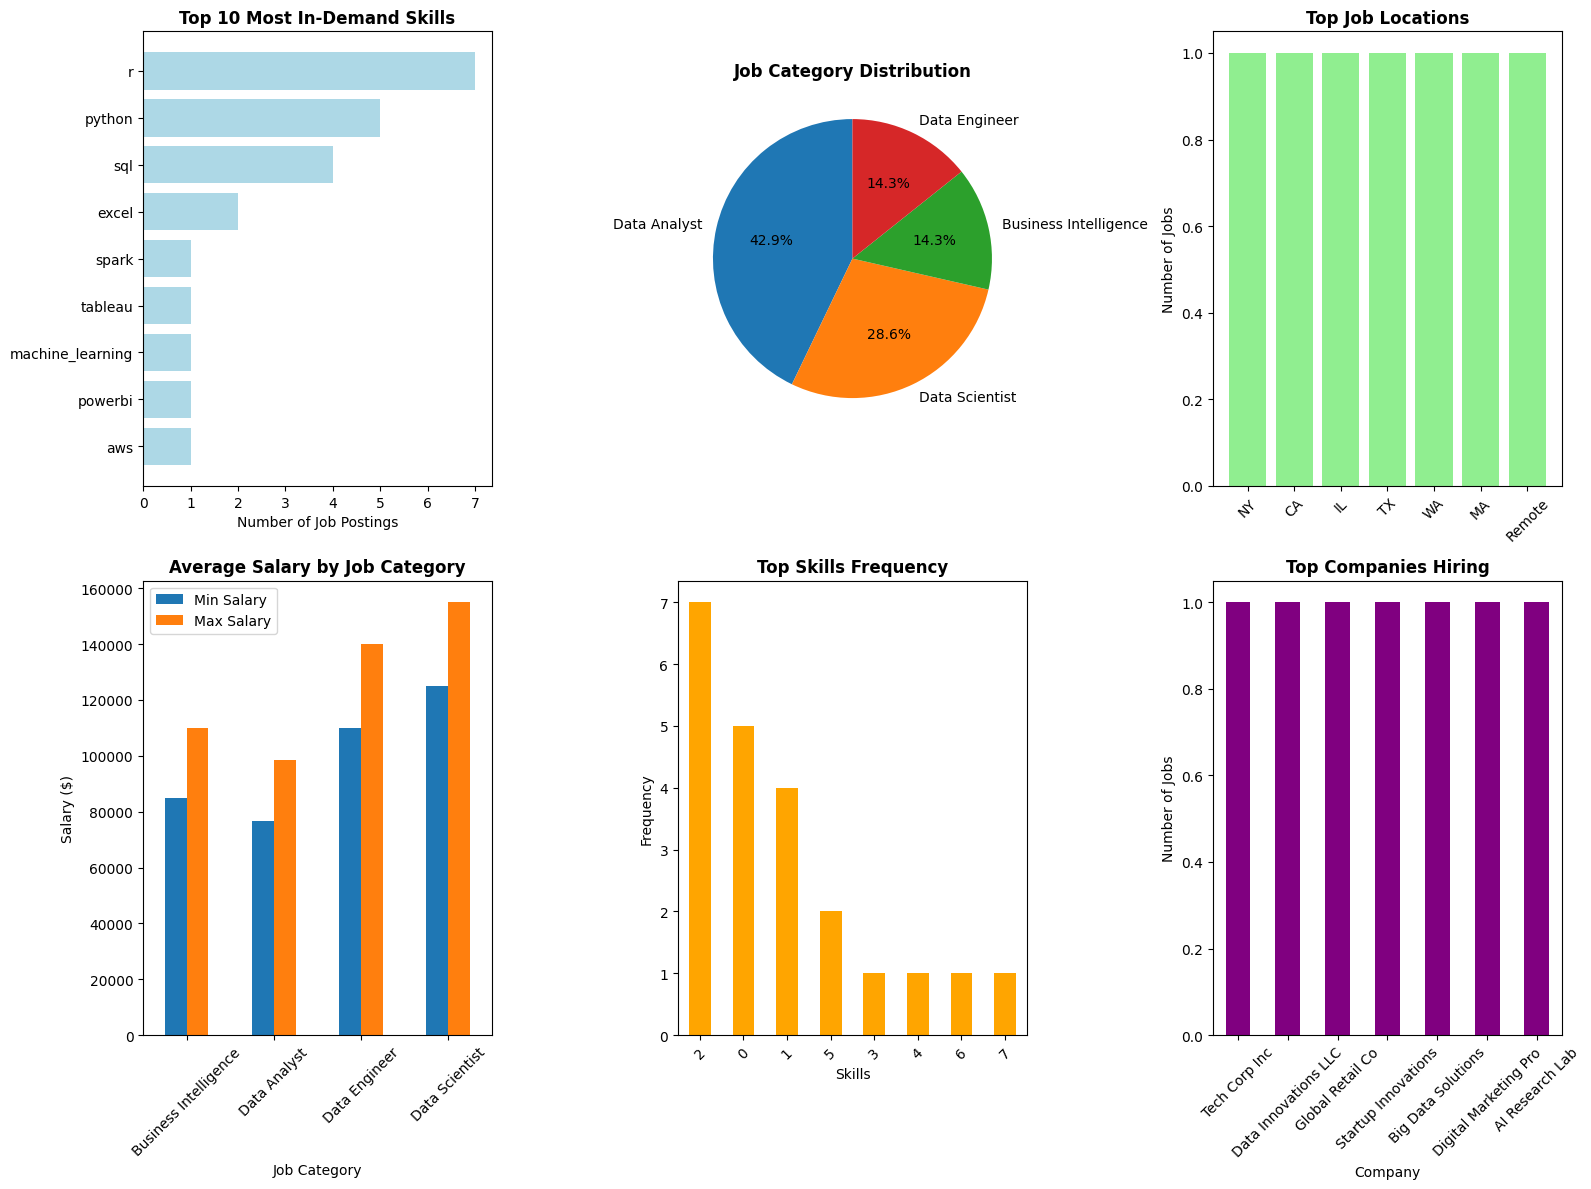

JOB MARKET ANALYSIS REPORT

📊 BASIC STATISTICS
   Total Jobs Analyzed: 7
   Unique Companies: 7
   Date Range: 2025-10-01 to 2025-10-01

🔧 TOP IN-DEMAND SKILLS
   R                     7 jobs (100.0%)
   PYTHON                5 jobs (71.4%)
   SQL                   4 jobs (57.1%)
   EXCEL                 2 jobs (28.6%)
   TABLEAU               1 jobs (14.3%)

💼 JOB CATEGORY BREAKDOWN
   Data Analyst               3 jobs (42.9%)
   Data Scientist             2 jobs (28.6%)
   Business Intelligence      1 jobs (14.3%)
   Data Engineer              1 jobs (14.3%)

📍 TOP LOCATIONS
   NY                    1 jobs (14.3%)
   CA                    1 jobs (14.3%)
   IL                    1 jobs (14.3%)
   TX                    1 jobs (14.3%)
   WA                    1 jobs (14.3%)

💰 SALARY INSIGHTS
   Business Intelligence     $85,000 - $110,000
   Data Analyst              $76,667 - $98,333
   Data Engineer             $110,000 - $140,000
   Data Scientist            $125,000 - $155,000

🔄 T

In [ ]:
# =============================================================================
# MAIN EXECUTION
# =============================================================================

def main():
    print("🚀 Starting Job Market Analysis...")

    # Check robots.txt
    check_robots_txt()

    # Choose data source
    use_live_data = False  # Set to True for live scraping (use responsibly)

    if use_live_data:
        print("Scraping live job data...")
        all_jobs = []
        for page in range(MAX_PAGES):
            jobs = scrape_job_page(page)
            all_jobs.extend(jobs)
            time.sleep(random.uniform(2, 4))  # Respectful delay
    else:
        print("Using demo data for analysis...")
        all_jobs = get_demo_jobs()

    print(f"✅ Collected {len(all_jobs)} job postings")

    # Clean and process data
    print("Cleaning and processing job data...")
    df_clean = clean_job_data(all_jobs)

    # Perform analyses
    print("Analyzing job market trends...")
    skills_analysis = analyze_skills_demand(df_clean)
    job_categories = analyze_job_categories(df_clean)
    locations_analysis = analyze_locations(df_clean)
    salary_analysis = analyze_salaries_by_category(df_clean)
    skill_combinations = analyze_skill_combinations(df_clean)

    # Create visualizations
    print("Creating visualizations...")
    create_analysis_visualizations(df_clean, skills_analysis, job_categories,
                                 locations_analysis, salary_analysis)

    # Generate report
    generate_analysis_report(df_clean, skills_analysis, job_categories,
                           locations_analysis, salary_analysis, skill_combinations)

    # Save results
    df_clean.to_csv('job_market_analysis_results.csv', index=False)
    print(f"\n💾 Results saved to 'job_market_analysis_results.csv'")

    # Show sample of data
    print(f"\n📋 Sample of Analyzed Jobs:")
    print(df_clean[['title', 'company', 'state', 'job_category']].head())

if __name__ == "__main__":
    main()